In [102]:
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [106]:
database = pd.read_csv('../data/song_database.csv')

audio_feat = database.drop(columns=['artist','song','uri','duration_ms'])

audio_feat

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.349,0.482,-10.482,0.0435,0.7780,0.001200,0.1210,0.526,86.027
1,0.559,0.163,-17.332,0.0504,0.8820,0.000016,0.1610,0.559,126.028
2,0.743,0.485,-9.604,0.0452,0.8210,0.000000,0.0817,0.512,101.975
3,0.557,0.486,-10.366,0.0978,0.4180,0.000000,0.2450,0.685,152.593
4,0.740,0.581,-6.466,0.0362,0.6590,0.068900,0.1990,0.969,103.429
...,...,...,...,...,...,...,...,...,...
27101,0.575,0.670,-10.390,0.0318,0.3430,0.000005,0.1290,0.740,139.191
27102,0.629,0.864,-7.561,0.0340,0.1120,0.247000,0.6480,0.958,123.325
27103,0.699,0.467,-8.578,0.0375,0.6850,0.000000,0.3150,0.764,119.287
27104,0.656,0.601,-7.734,0.0389,0.0553,0.066700,0.0974,0.576,117.296


In [107]:
audio_scaled = StandardScaler().fit_transform(audio_feat)

pd.DataFrame(audio_scaled,columns=audio_feat.columns)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.657061,-1.021082,-0.878527,-0.487640,2.064011,-0.548555,-0.496054,0.262223,-1.477809
1,-0.228030,-2.439363,-2.602632,-0.407951,2.436943,-0.552464,-0.274432,0.392800,0.079061
2,1.024073,-1.007744,-0.657540,-0.468006,2.218204,-0.552519,-0.713797,0.206826,-0.857100
3,-0.241640,-1.003298,-0.849331,0.139473,0.773092,-0.552519,0.190972,0.891370,1.112992
4,1.003658,-0.580925,0.132277,-0.571948,1.637290,-0.324930,-0.063892,2.015128,-0.800509
...,...,...,...,...,...,...,...,...,...
27101,-0.119152,-0.185229,-0.855371,-0.622764,0.504150,-0.552502,-0.451729,1.108999,0.591376
27102,0.248313,0.677299,-0.143328,-0.597356,-0.324189,0.263365,2.423807,1.971603,-0.026141
27103,0.724657,-1.087772,-0.399301,-0.556934,1.730523,-0.552519,0.578810,1.203964,-0.183304
27104,0.432046,-0.492005,-0.186871,-0.540765,-0.527509,-0.332197,-0.626810,0.460068,-0.260795


### Choosing K with Elbow Method and Silhouette

In [114]:
K = range(20, 40)

inertia = []
silhouette = []

for k in K:
    
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=20,random_state=1234)
    
    kmeans.fit(audio_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(audio_scaled, kmeans.predict(audio_scaled)))
    
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

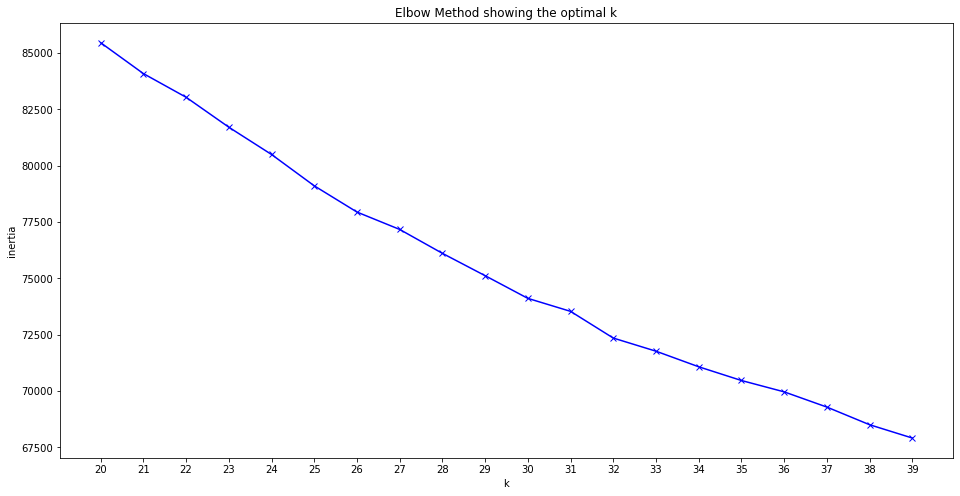

In [115]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

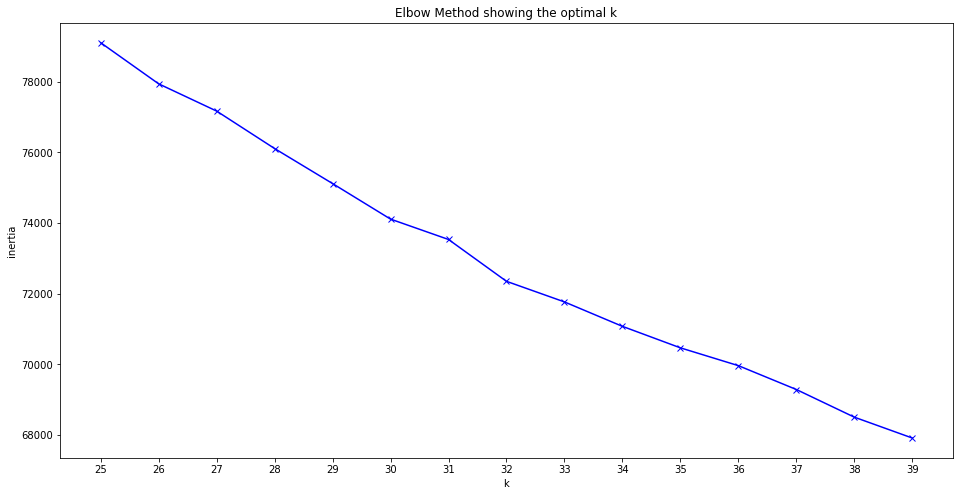

In [116]:
plt.figure(figsize=(16,8))
plt.plot(K[5:], inertia[5:], 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(K[5], max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

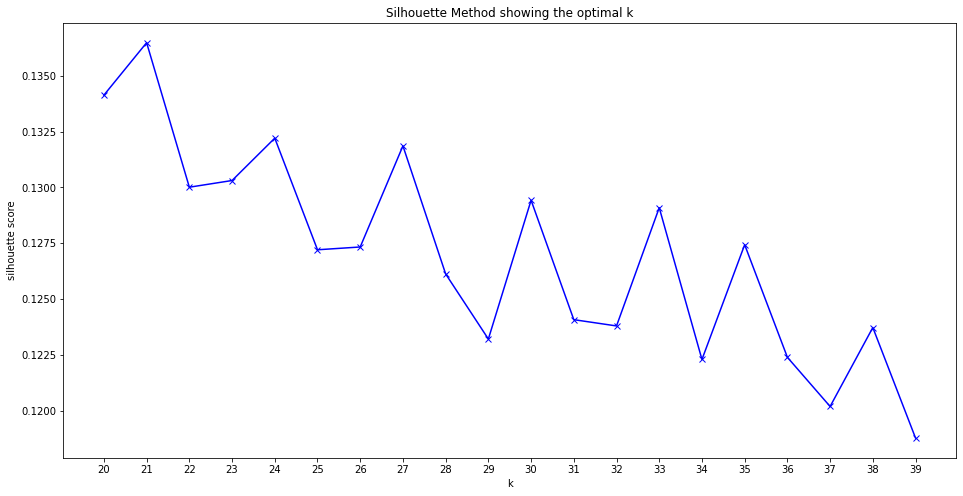

In [117]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

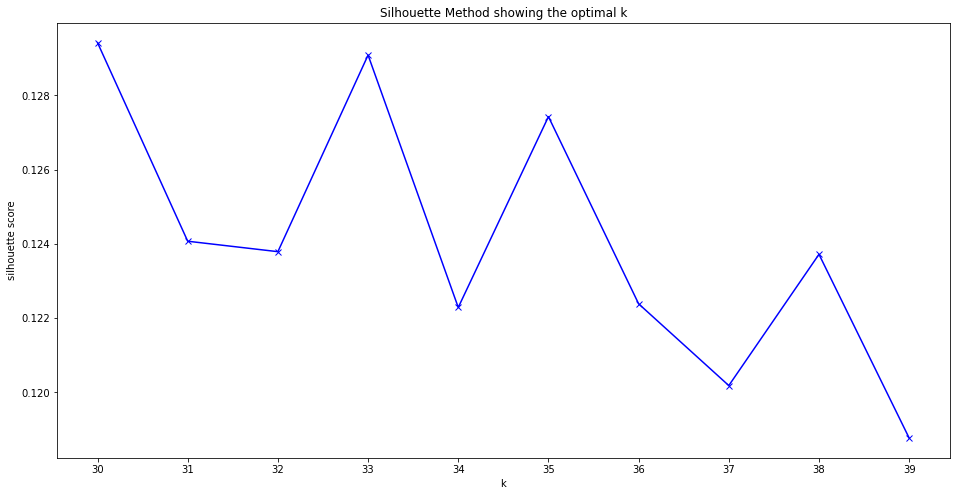

In [118]:
plt.figure(figsize=(16,8))
plt.plot(K[10:], silhouette[10:], 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(K[10], max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### Clustering

In [119]:
kmeans_final = KMeans(n_clusters=30,n_init=20,max_iter=200,random_state=1234)

kmeans_final.fit(audio_scaled)

KMeans(max_iter=200, n_clusters=30, n_init=20, random_state=1234)

In [120]:
with open("../data/scaler.pickle", "wb") as f:
    pickle.dump(kmeans_final,f)

In [121]:
clusters = kmeans_final.predict(audio_scaled)
pd.Series(clusters).value_counts().sort_index()

0     1245
1     1016
2      752
3     1598
4     1355
5      622
6     1372
7      943
8      632
9      562
10     388
11    1810
12    1917
13     910
14     536
15     738
16     962
17     744
18    1177
19     974
20     617
21    1428
22     987
23     205
24    1070
25     651
26     261
27     594
28     826
29     214
dtype: int64

In [122]:
new_database = database.copy()

new_database['cluster'] = clusters

new_database.to_csv('../data/clustered_database.csv',index=False)

new_database.loc[new_database['cluster']==4]

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
29,Atraente,"Luis Otávio, Mallu Magalhães",spotify:track:22QtqOOwAShcEEYgEcQvki,0.755,0.503,-10.402,0.1520,0.25200,0.000010,0.0916,0.492,90.256,144169,4
32,Boa Sorte / Good Luck (feat. Ben Harper),"Vanessa Da Mata, Ben Harper",spotify:track:6A3Q8BVAAI2PW1s6MX4ZGF,0.780,0.566,-9.289,0.0500,0.32300,0.000463,0.0814,0.281,111.019,235600,4
127,Sei Lá,Luê,spotify:track:41IwizU26KiLMZONRvJfar,0.768,0.589,-6.719,0.0300,0.02310,0.000000,0.0957,0.459,103.987,231573,4
194,Pupila,"ANAVITÓRIA, Vitor Kley",spotify:track:7Gk5OrMYaMRtT2JmgJVAfk,0.716,0.426,-9.576,0.1280,0.40100,0.000000,0.1100,0.434,88.794,202288,4
196,Pausa #omundoprecisadepausa,Vicka,spotify:track:14t2jBUMu8OdZyQJQKIf25,0.708,0.553,-7.428,0.0277,0.15300,0.000000,0.1140,0.522,121.995,199500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27024,Phantom Pain,Isa,spotify:track:0ylqUnebv7q7hArXK7HGdS,0.729,0.350,-10.088,0.0413,0.21300,0.000000,0.0835,0.120,110.122,257000,4
27034,Hit Your Town,Lulu Lewis,spotify:track:3bBAfLcADF3ET2r7Qp0i8i,0.743,0.805,-7.448,0.0300,0.00408,0.118000,0.1030,0.388,119.954,214320,4
27035,Hiding Home,Nouhi's Nomad,spotify:track:41SDofPSFLdgIt8mpMmhHQ,0.697,0.596,-7.459,0.0377,0.08480,0.000001,0.2790,0.325,86.059,236544,4
27064,Living Strange,Wes King,spotify:track:5CPRCMQTc3Fl2IAQHDmVGR,0.681,0.572,-6.376,0.0313,0.31000,0.000000,0.0813,0.528,128.004,216967,4
